#Importation et preparation des données

In [1]:
!pip install --upgrade kneed

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Stage/data.csv', index_col=None)


In [5]:
df.shape

(2118693, 15)

In [6]:
df

,customer_number,article_number,warehouse_code,shipping_date,description,description_2,unit,amount,net_weight,unit_per_pack,order_number,business_unit,booking_date,article_class,pics_number
0,2004641,8245405,R6,2016-05-31,TURNBUCKLE WITH TWO FORKS,ART.-NO. 8245 A4 M5,pcs,150,0.056,10,ORD1000449,EU,2016-06-02,6,15
1,2004641,8454405,R6,2016-05-31,"ESS THREADED EYE, RIGHT THREAD",ART.-NO. 8454 A4 M5,pcs,200,0.008,10,ORD1000449,EU,2016-06-02,6,20
2,2004641,8267406 040,R6,2016-05-31,EYE BOLT WITH METRIC THREAD,ART.-NO. 8267 A4 6X40,pcs,200,0.027,20,ORD1000449,EU,2016-06-02,6,10
3,2004641,82464B06,R6,2016-05-31,TURNBUCKLE HOOK-HOOK,ART.-NO. 8246 A4 B 6MM,pcs,60,0.084,10,ORD1000449,EU,2016-06-02,6,6
4,2002576,8301404,R6,2016-05-31,CHAIN A4 4MM,IN FORM AND MEASURE TO DIN 763,m,200,0.242,50,ORD1000458,EU,2016-06-02,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118688,2005319,BH82354100 25,M16,2022-04-27,Hinge,A4 100x25mm,pcs,8,0.064,1,ORD1186328,EU,2022-05-02,8,8
2118689,2005319,BH8230208 100,M16,2022-04-27,U-bolt with counter plate,A2 M8x100mm,pcs,5,0.085,1,ORD1186328,EU,2022-05-02,8,5
2118690,2005319,BH8226205,M16,2022-04-27,Fender eye,A2 5x50mm,pcs,20,0.011,1,ORD1186328,EU,2022-05-02,8,20
2118691,2005319,BH82244075,M16,2022-04-27,Oval pad eye,"A4 75x22mm, bow 7.0mm",pcs,6,0.076,1,ORD1186328,EU,2022-05-02,8,6


In [7]:
#corriger le type DATE
df['shipping_date'] = pd.to_datetime(df['shipping_date'])
df['booking_date'] = pd.to_datetime(df['booking_date'])

In [8]:
# somme des pics par client $$$
table = pd.pivot_table(df,index=["customer_number"],values=["pics_number"],aggfunc=np.sum)
table=table.rename(columns={"pics_number": "pics_sum"})
table

,pics_sum
customer_number,
1000011,92
1000014,2033
1000020,255
1000022,1
1000026,1318
...,...
2008655,3
2008656,3
2008658,60


In [9]:
df3=df
df3['order_sum']=1
table1 = pd.pivot_table(df3,index=["customer_number"],values=["order_sum"],aggfunc=np.sum)
table1



,order_sum
customer_number,
1000011,41
1000014,829
1000020,123
1000022,1
1000026,362
...,...
2008655,3
2008656,3
2008658,8


In [10]:
df1 = table.reset_index()
df2 = table1.reset_index()
df=pd.merge(df1,df2, how='left', on='customer_number')

In [11]:
df.rename(columns = {'customer_number':'Clients','pics_sum':'Nbr total de paquets','order_sum':'Nbr total de commandes'
                     }
                     ,inplace = True)


In [12]:
df['Nbr total de paquets'] = df['Nbr total de paquets'].astype(int)

In [13]:
df

,Clients,Nbr total de paquets,Nbr total de commandes
0,1000011,92,41
1,1000014,2033,829
2,1000020,255,123
3,1000022,1,1
4,1000026,1318,362
...,...,...,...
3797,2008655,3,3
3798,2008656,3,3
3799,2008658,60,8
3800,2008660,19,9


In [14]:
df.sort_values(by = ['Nbr total de paquets','Nbr total de commandes'], ascending = False)

,Clients,Nbr total de paquets,Nbr total de commandes
876,1004052,1665438,700046
2533,2005319,344698,137538
2556,2005436,309921,88223
2443,2004814,273678,75117
1132,1004968,240016,41281
...,...,...,...
3639,2008311,1,1
3675,2008387,1,1
3725,2008481,1,1
3726,2008482,1,1


In [15]:
df.drop(df[df['Nbr total de paquets'] == 988066 ].index, inplace = True)

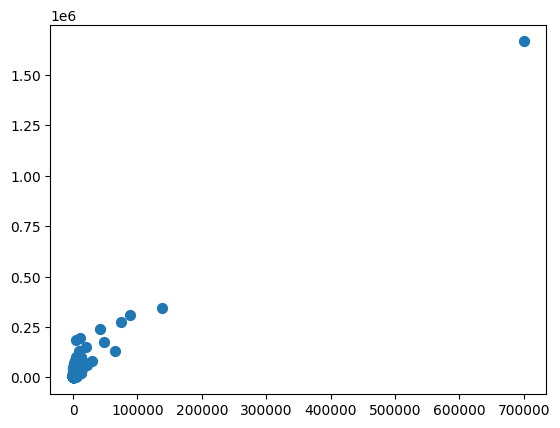

In [16]:
plt.scatter(df['Nbr total de commandes'],df['Nbr total de paquets'],s=50)

In [17]:
df

,Clients,Nbr total de paquets,Nbr total de commandes
0,1000011,92,41
1,1000014,2033,829
2,1000020,255,123
3,1000022,1,1
4,1000026,1318,362
...,...,...,...
3797,2008655,3,3
3798,2008656,3,3
3799,2008658,60,8
3800,2008660,19,9


In [18]:
df=df.set_index('Clients')

#La methode de Coude pour choisir K optimal

In [ ]:
dff=df

In [ ]:
dff

,Nbr total de paquets,Nbr total de commandes
Clients,,
1000011,92,41
1000014,2033,829
1000020,255,123
1000022,1,1
1000026,1318,362
...,...,...
2008655,3,3
2008656,3,3
2008658,60,8


In [ ]:
Inertia = []
K = range ( 1 , 10 )

for k in K :
    kmeanModel = KMeans( n_clusters=k )
    kmeanModel.fit(dff )
    Inertia.append( kmeanModel.inertia_ )

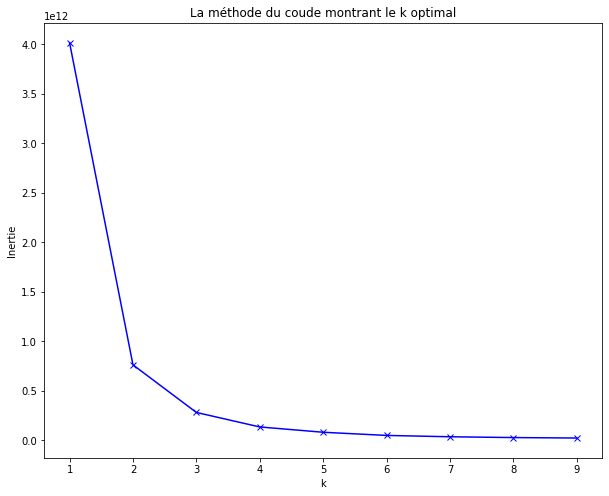

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(K, Inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertie')
plt.title('La méthode du coude montrant le k optimal')
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 10), Inertia, curve="convex", direction="decreasing"
)

print('le nombre optimal de classes est K =',kl.elbow)


le nombre optimal de classes est K = 2


Pour déterminer le nombre optimal de clusters, il faut sélectionner le point après lequel l'inertie commence à diminuer de façon linéaire.
Ainsi,nous concluons que **le nombre optimal de K est 3.**

#K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df_ss=ss.fit_transform(dff)

In [ ]:
df_ss

array([[-0.17962598, -0.09588159],
       [-0.03832252,  0.13153528],
       [-0.16775969, -0.07221638],
       ...,
       [-0.18195555, -0.10540539],
       [-0.18494033, -0.10511679],
       [-0.18625071, -0.10742559]])

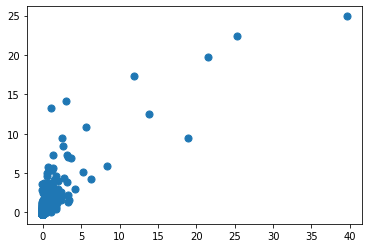

In [ ]:
dft = pd.DataFrame(df_ss, columns = ['Nbr total de paquets','Nbr total de commandes'])
plt.scatter(dft['Nbr total de commandes'],dft['Nbr total de paquets'],s=50)

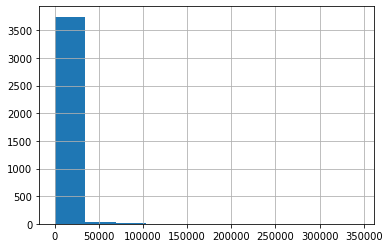

In [ ]:
hist = dff['Nbr total de paquets'].hist()

plt.savefig("pandas_hist_01.png", bbox_inches='tight', dpi=10)

In [ ]:
dff.drop(dff[dff['Nbr total de commandes'] == 700046].index, inplace = True)

In [ ]:
dff.sort_values(by = ['Nbr total de commandes'], ascending = False)

,Nbr total de paquets,Nbr total de commandes
Clients,,
2005319,344698,137538
2005436,309921,88223
2004814,273678,75117
2005281,133147,65745
2004995,174870,48087
...,...,...
1007072,6,1
1002158,2,1
1007057,1,1


In [ ]:
#Clustering
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(dff)


KMeans(n_clusters=3)

In [ ]:
#Clustering Results
data_with_clusters = dff.copy()
data_with_clusters['k_means']=kmeanModel.predict(dff)

In [ ]:
data_with_clusters.sort_values(by = ['Nbr total de commandes'], ascending = False).head(7)

,Nbr total de paquets,Nbr total de commandes,k_means
Clients,,,
2005319,344698,137538,1
2005436,309921,88223,1
2004814,273678,75117,1
2005281,133147,65745,2
2004995,174870,48087,1
1004968,240016,41281,1
2006582,83795,29287,2


In [ ]:
dfC1=data_with_clusters[data_with_clusters['k_means']==1]

In [ ]:
dfC0.sort_values(by = ['Nbr total de paquets'], ascending = False)

,Nbr total de paquets,Nbr total de commandes,k_means
Clients,,,
2001531,29050,1149,0
2006302,28618,3311,0
2006462,28252,1441,0
2005589,27918,5163,0
2003515,27503,3413,0
...,...,...,...
1010272,1,1,0
2000067,1,1,0
2000112,1,1,0


In [ ]:
dfC0=data_with_clusters[data_with_clusters['k_means']==0]

In [ ]:
dfC2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1000182 to 2007592
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Nbr total de paquets    61 non-null     int64
 1   Nbr total de commandes  61 non-null     int64
 2   k_means                 61 non-null     int32
dtypes: int32(1), int64(2)
memory usage: 1.7 KB


In [ ]:
dfC2=data_with_clusters[data_with_clusters['k_means']==2]

In [ ]:
dfCluster = data_with_clusters.reset_index()

In [ ]:
dfC0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 1000011 to 2008668
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Nbr total de paquets    3738 non-null   int64
 1   Nbr total de commandes  3738 non-null   int64
 2   k_means                 3738 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 102.2 KB


In [ ]:
56+3738+7

3801

In [ ]:
file_name = 'CustomerCluster.xlsx'

# saving the excelsheet
dfCluster.to_excel(file_name)

Text(0, 0.5, 'Somme de commandes par client')

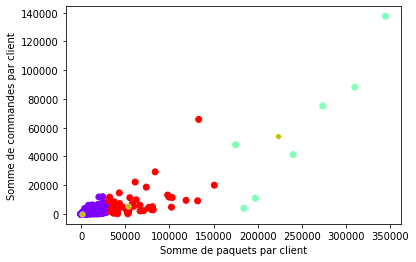

In [ ]:
import seaborn as sns
plt.scatter(data_with_clusters['Nbr total de paquets'],data_with_clusters['Nbr total de commandes'],c=data_with_clusters['k_means'],cmap='rainbow')
sns.scatterplot(centroids[:,0], centroids[:, 1], s=30, color='y')
plt.xlabel('Somme de paquets par client')

plt.ylabel('Somme de commandes par client')

In [ ]:
3802-6

3796

In [ ]:
3796-66

3730

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

score = silhouette_score(data_with_clusters, kmeanModel.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.949


#2eme essai

In [ ]:
dff

,Nbr total de paquets,Nbr total de commandes
Clients,,
1000011,92,41
1000014,2033,829
1000020,255,123
1000022,1,1
1000026,1318,362
...,...,...
2008655,3,3
2008656,3,3
2008658,60,8


In [ ]:
#Convert to numpy array
X = dff.values
X.shape

(3801, 2)

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

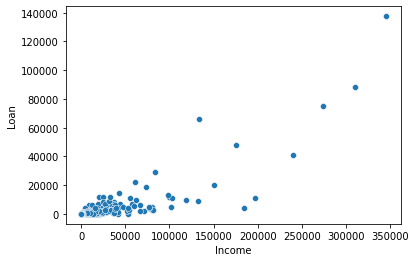

In [ ]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [ ]:
#Calculate WCSS
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
#Implement K-Means
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = dff.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X):
        mn_dist = float('inf')
        # dist of the point from all centroids
        for idx, centroid in enumerate(centroids):
          d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
          if mn_dist > d:
            mn_dist = d
            cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
       centroids = new_centroids
  return centroids, cluster

In [ ]:
#Make clusters
k = 3
centroids, cluster = kmeans(X, k)


In [ ]:
cluster


array([2., 2., 2., ..., 2., 2., 2.])

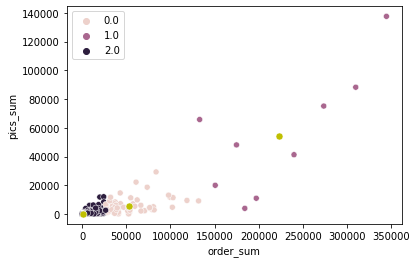

In [ ]:
#Visualize the clusters formed
sns.scatterplot(X[:,0], X[:, 1],hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=50, color='y')
plt.xlabel('order_sum')
plt.ylabel('pics_sum')
plt.show()